In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# CUSTOMERS

In [3]:
# Read CSV file
customers = pd.read_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\raw\customers.csv")
customers

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,NaN,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South
...,...,...,...,...,...,...,...
811,C0476,John,Le,Female,29.0,2022-11-23,West
812,C0059,Alison,Berger,Male,56.0,2020-11-16,West
813,C0600,Timothy,Cunningham,Male,39.0,2021-04-24,South
814,C0480,Matthew,Moore,Female,27.0,2020-05-23,South


In [4]:
# Basic info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [5]:
# Display first few rows
customers.head()

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,NaN,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South


In [6]:
# Check for missing values
print(customers.isnull().sum())

customer_id     0
first_name      0
last_name       0
gender          0
age            40
signup_date     0
region          0
dtype: int64


In [7]:
# Check for duplicate values
print(customers.duplicated().sum())

16


In [8]:
#filling missing values 
customers['age'] = customers['age'].fillna(customers['age'].median())

In [9]:
#dropping duplicates
customers = customers.drop_duplicates()

In [10]:
#check null and duplicates values
print(customers.isnull().sum())

print('no of duplicates :-',customers.duplicated().sum())

customer_id    0
first_name     0
last_name      0
gender         0
age            0
signup_date    0
region         0
dtype: int64
no of duplicates :- 0


In [11]:
#addind a column
customers["age_group"] = pd.cut(
    customers["age"],
    bins=[0, 25, 40, 60, 100],
    labels=["18-25", "26-40", "41-60", "60+"]
)


C:\Users\admin\AppData\Local\Temp\ipykernel_36764\1208448151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers["age_group"] = pd.cut(


In [16]:
#change data type
customers['age'] = customers['age'].astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_36764\3394697713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['age'] = customers['age'].astype(int)


In [13]:
#change date type
customers['signup_date'] = pd.to_datetime(customers['signup_date'])


C:\Users\admin\AppData\Local\Temp\ipykernel_36764\3514754623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['signup_date'] = pd.to_datetime(customers['signup_date'])


In [14]:
#check data type
customers.dtypes

customer_id            object
first_name             object
last_name              object
gender                 object
age                     int64
signup_date    datetime64[ns]
region                 object
age_group            category
dtype: object

In [15]:
#save csv file
customers.to_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\cleaned\customers_cleaned.csv")
customers

,customer_id,first_name,last_name,gender,age,signup_date,region,age_group
0,C0000,Patrick,Morgan,Male,18,2024-07-11,South,18-25
1,C0001,Eric,Lee,Other,36,2020-09-20,East,26-40
2,C0002,Thomas,Pena,Female,44,2021-03-07,East,41-60
3,C0003,Dalton,Duran,Male,24,2021-08-29,South,18-25
4,C0004,Travis,Mcclain,Male,50,2023-03-29,South,41-60
...,...,...,...,...,...,...,...,...
795,C0795,Emily,Smith,Male,42,2025-04-03,South,41-60
796,C0796,Jonathan,Gardner,Other,20,2023-03-08,South,18-25
797,C0797,Jordan,Smith,Other,56,2020-04-29,West,41-60
798,C0798,Rachel,Porter,Other,39,2020-08-12,South,26-40


# PRODUCTS

In [60]:
# read csv file
products = pd.read_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\raw\products.csv")
products

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35
...,...,...,...,...,...,...,...
1219,P0998,BrandB Stuff,Personal Care,BrandD,13.87,19.62,29.31
1220,P0684,BrandA Hear,Home & Kitchen,BrandC,161.31,222.84,27.61
1221,P0498,BrandD South,Personal Care,BrandD,19.73,35.81,44.90
1222,P1016,BrandA Watch,Electronics,BrandC,186.81,321.00,41.80


In [61]:
#check top rows
products.head()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35


In [62]:
#basic info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1224 non-null   object 
 1   product_name  1224 non-null   object 
 2   category      1224 non-null   object 
 3   brand         1164 non-null   object 
 4   cost_price    1224 non-null   float64
 5   unit_price    1224 non-null   float64
 6   margin_pct    1224 non-null   float64
dtypes: float64(3), object(4)
memory usage: 67.1+ KB


In [63]:
# check null values
products.isnull().sum()

product_id       0
product_name     0
category         0
brand           60
cost_price       0
unit_price       0
margin_pct       0
dtype: int64

In [64]:
#check duplicate values
products.duplicated().sum()

np.int64(24)

In [65]:
#fill unknown
products['brand'] = products['brand'].fillna('unknown')

In [66]:
#drop duplicates
products = products.drop_duplicates()

In [67]:
#check null and duplicates
print(products.isnull().sum())

print('no.of duplicates:- ',products.duplicated().sum())

product_id      0
product_name    0
category        0
brand           0
cost_price      0
unit_price      0
margin_pct      0
dtype: int64
no.of duplicates:-  0


In [68]:
#save csv file
products.to_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\cleaned\products_cleaned.csv")
products

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35
...,...,...,...,...,...,...,...
1195,P1195,BrandB Challenge,Home & Kitchen,BrandB,15.31,21.82,29.84
1196,P1196,BrandC Better,Electronics,BrandC,61.87,103.64,40.30
1197,P1197,BrandA Own,Apparel,BrandB,154.11,252.57,38.98
1198,P1198,BrandB Your,Home & Kitchen,BrandC,166.23,285.33,41.74


# SALES

In [69]:
#read csv file
sales = pd.read_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\raw\sales_data.csv")
sales

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,2024-01-31,C0125,P1086,NaN,Online,2,80.63,0.05,153.20
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00
2,O00002,2023-08-29,C0653,P0659,NaN,Online,2,218.60,0.10,393.48
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94
...,...,...,...,...,...,...,...,...,...,...
3055,O02044,2024-09-26,C0580,P0886,S024,In-Store,2,82.92,0.00,165.84
3056,O02352,2023-11-16,C0632,P0091,S034,In-Store,1,27.29,0.10,24.56
3057,O02014,2023-06-25,C0127,P0296,NaN,Online,3,34.89,0.00,104.67
3058,O01371,2025-02-12,C0741,P1056,NaN,Online,1,57.51,0.05,54.63


In [70]:
#basic info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       3060 non-null   object 
 1   order_date     3060 non-null   object 
 2   customer_id    3060 non-null   object 
 3   product_id     3060 non-null   object 
 4   store_id       2068 non-null   object 
 5   sales_channel  3060 non-null   object 
 6   quantity       3060 non-null   int64  
 7   unit_price     3060 non-null   float64
 8   discount_pct   3060 non-null   float64
 9   total_amount   3060 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 239.2+ KB


In [71]:
#check top rows
sales.head()

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,2024-01-31,C0125,P1086,NaN,Online,2,80.63,0.05,153.20
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00
2,O00002,2023-08-29,C0653,P0659,NaN,Online,2,218.60,0.10,393.48
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94


In [72]:
#check null values
print(sales.isnull().sum())

order_id           0
order_date         0
customer_id        0
product_id         0
store_id         992
sales_channel      0
quantity           0
unit_price         0
discount_pct       0
total_amount       0
dtype: int64


In [73]:
#check duplicates
print(sales.duplicated().sum())

60


In [74]:
#changing data type
sales['order_date'] = pd.to_datetime(sales['order_date'])

In [75]:
#fill with unknown
sales['store_id'] = sales["store_id"].fillna("UNKNOWN")

In [76]:
#drop duplicates
sales = sales.drop_duplicates()

In [77]:
#check null and duplicate values
print(sales.isnull().sum())

print('no of duplicates :-',sales.duplicated().sum())

order_id         0
order_date       0
customer_id      0
product_id       0
store_id         0
sales_channel    0
quantity         0
unit_price       0
discount_pct     0
total_amount     0
dtype: int64
no of duplicates :- 0


In [78]:
#chech data types
sales.dtypes

order_id                 object
order_date       datetime64[ns]
customer_id              object
product_id               object
store_id                 object
sales_channel            object
quantity                  int64
unit_price              float64
discount_pct            float64
total_amount            float64
dtype: object

In [79]:
#adding column
sales = sales.merge(products[["product_id", "cost_price"]],on="product_id",how="left")

sales["profit"] = (sales["total_amount"] -(sales["cost_price"] * sales["quantity"]))


In [80]:
#save csv file
sales.to_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\cleaned\sales_cleaned.csv")

In [81]:
sales

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount,cost_price,profit
0,O00000,2024-01-31,C0125,P1086,UNKNOWN,Online,2,80.63,0.05,153.20,69.87,13.46
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00,120.11,1571.80
2,O00002,2023-08-29,C0653,P0659,UNKNOWN,Online,2,218.60,0.10,393.48,173.17,47.14
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82,65.86,-3.04
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94,174.83,101.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,O02995,2025-03-09,C0346,P0972,UNKNOWN,Online,1,113.58,0.20,90.86,81.65,9.21
2996,O02996,2024-11-10,C0714,P0856,S047,In-Store,1,72.18,0.05,68.57,53.24,15.33
2997,O02997,2024-08-18,C0217,P0586,S021,In-Store,3,276.20,0.20,662.88,192.31,85.95
2998,O02998,2023-11-11,C0591,P0053,S006,In-Store,1,222.76,0.20,178.21,186.69,-8.48


# STORES


In [82]:
#read csv file
stores = pd.read_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\raw\stores.csv")
stores

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26
...,...,...,...,...,...,...
56,S056,"Johnson, Sims and Miles Store",Mall Kiosk,East,Los Angeles,75869.37
57,S057,"Crawford, Spencer and Lopez Store",Franchise,West,Houston,52756.63
58,S058,Hubbard-Thomas Store,Mall Kiosk,East,New York,10215.93
59,S059,"Foster, Gutierrez and Li Store",Franchise,West,Los Angeles,11797.63


In [83]:
#check top rows
stores.head()

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26


In [84]:
#basic info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_id        61 non-null     object 
 1   store_name      61 non-null     object 
 2   store_type      61 non-null     object 
 3   region          61 non-null     object 
 4   city            61 non-null     object 
 5   operating_cost  61 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


In [85]:
#check null values
stores.isnull().sum()

store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64

In [86]:
#check duplicate values
stores.duplicated().sum()

np.int64(1)

In [87]:
#drop duplicate values
stores = stores.drop_duplicates()

In [88]:
# check duplicate values
print('no.of duplicates:- ',stores.duplicated().sum())

no.of duplicates:-  0


In [89]:
#save csv file
stores.to_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\cleaned\stores_cleaned.csv")
stores

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26
5,S005,Mayer-Scott Store,Flagship,North,Houston,14898.94
6,S006,"Stewart, Lowe and Quinn Store",Flagship,North,Los Angeles,75679.22
7,S007,Marshall PLC Store,Flagship,North,Los Angeles,51484.15
8,S008,Mcdaniel-Bennett Store,Flagship,South,Phoenix,15471.52
9,S009,"Rasmussen, Meyers and Mendoza Store",Franchise,West,Chicago,21491.12


# RETURNS

In [90]:
#read csv file
returns = pd.read_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\raw\returns.csv")
returns

,return_id,order_id,return_date,return_reason
0,R0000,O02237,2024-03-05,Defective
1,R0001,O01700,2025-03-18,Defective
2,R0002,O01451,2025-02-18,Late Delivery
3,R0003,O02759,2023-10-26,Defective
4,R0004,O00415,2024-08-06,No Longer Needed
...,...,...,...,...
199,R0199,O01305,2025-01-26,No Longer Needed
200,R0182,O00585,2024-08-24,Late Delivery
201,R0156,O01596,2024-01-27,No Longer Needed
202,R0194,O00934,2024-09-09,Wrong Item


In [91]:
#check top rows
returns.head()

,return_id,order_id,return_date,return_reason
0,R0000,O02237,2024-03-05,Defective
1,R0001,O01700,2025-03-18,Defective
2,R0002,O01451,2025-02-18,Late Delivery
3,R0003,O02759,2023-10-26,Defective
4,R0004,O00415,2024-08-06,No Longer Needed


In [92]:
#basic info
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   return_id      204 non-null    object
 1   order_id       204 non-null    object
 2   return_date    204 non-null    object
 3   return_reason  204 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [93]:
#check null values
returns.isnull().sum()

return_id        0
order_id         0
return_date      0
return_reason    0
dtype: int64

In [94]:
#check duplicate values
returns.duplicated().sum()

np.int64(4)

In [95]:
#drop duplicate values
returns = returns.drop_duplicates()

In [96]:
#check duplicate values
print('no of duplicates:- ',returns.duplicated().sum())

no of duplicates:-  0


In [97]:
#change date type
returns['return_date'] = pd.to_datetime(returns['return_date'])

C:\Users\admin\AppData\Local\Temp\ipykernel_18300\654646207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns['return_date'] = pd.to_datetime(returns['return_date'])


In [98]:
#check data type
returns.dtypes

return_id                object
order_id                 object
return_date      datetime64[ns]
return_reason            object
dtype: object

In [99]:
#save csv file
returns.to_csv(r"C:\Users\admin\Desktop\Retail_Sales_Capstone\data\cleaned\returns_cleaned.csv")
returns

,return_id,order_id,return_date,return_reason
0,R0000,O02237,2024-03-05,Defective
1,R0001,O01700,2025-03-18,Defective
2,R0002,O01451,2025-02-18,Late Delivery
3,R0003,O02759,2023-10-26,Defective
4,R0004,O00415,2024-08-06,No Longer Needed
...,...,...,...,...
195,R0195,O00416,2023-08-25,Defective
196,R0196,O01008,2024-10-25,Wrong Item
197,R0197,O02732,2023-06-16,Defective
198,R0198,O01287,2023-05-02,Late Delivery


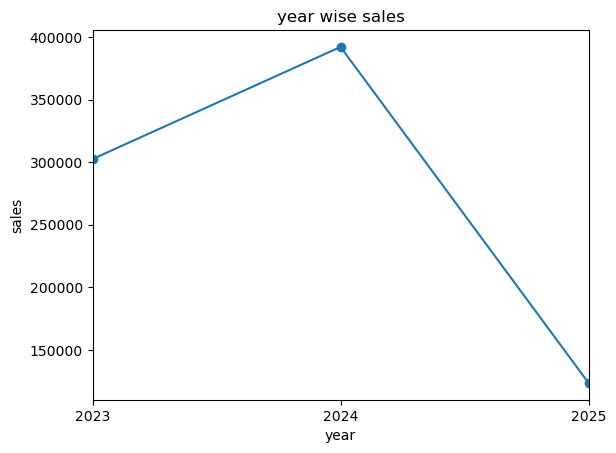

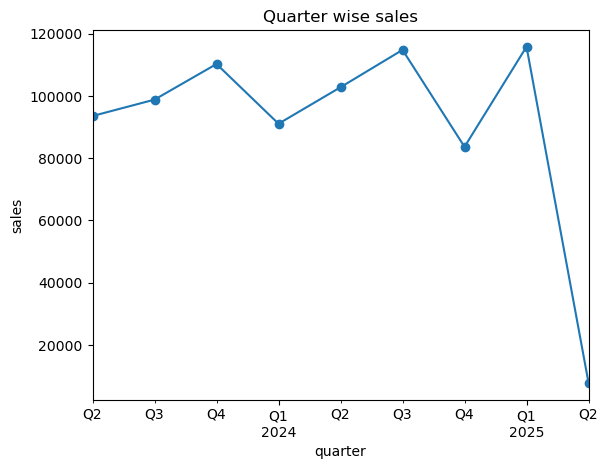

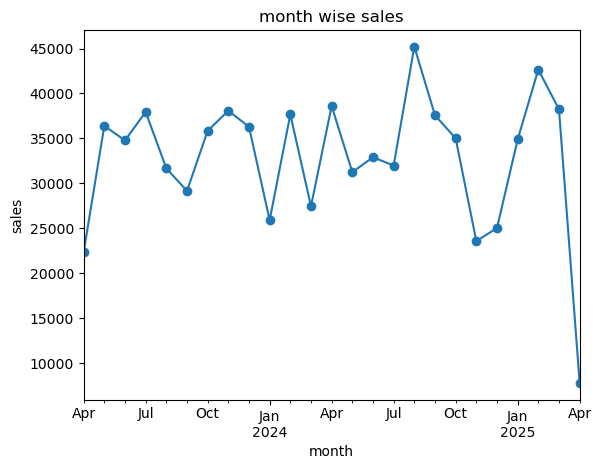

In [100]:
# sales trends year wise,quarter wise,month wise sales

sales['year'] = sales['order_date'].dt.to_period('Y')
year_sales = sales.groupby('year')['total_amount'].sum()
year_sales.plot(kind='line' , marker='o')
plt.title('year wise sales')
plt.xlabel('year')
plt.ylabel('sales')
plt.show()

sales['quarter'] = sales['order_date'].dt.to_period('Q')
quarter_sales = sales.groupby('quarter')['total_amount'].sum()
quarter_sales.plot(kind='line' , marker='o')
plt.title('Quarter wise sales')
plt.xlabel('quarter')
plt.ylabel('sales')
plt.show()

sales['month'] = sales['order_date'].dt.to_period('M')
month_sales = sales.groupby('month')['total_amount'].sum()
month_sales.plot(kind='line' , marker='o')
plt.title('month wise sales')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

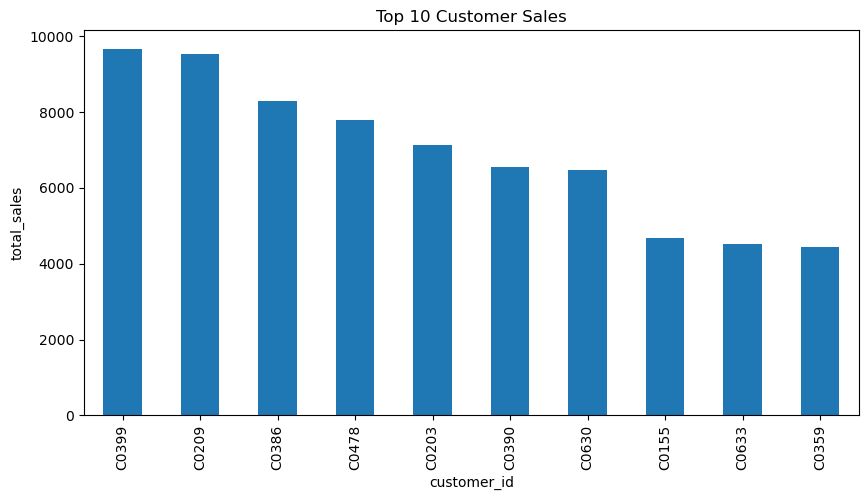

In [101]:
#top 10 customer sales

top_customers = sales.groupby('customer_id')['total_amount'].sum().sort_values(ascending = False).head(10)
top_customers.plot(kind='bar' , figsize=(10,5))
plt.title('Top 10 Customer Sales')
plt.ylabel('total_sales')
plt.show()